# Final Project CPSC 381: Introduction to Machine learning
Diego Aspinwall, Ethan Mathieu, Taimur Moolji

In [54]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pickle

GREEN = "#56D6B3"
BLUE = "#636FFA"
RED = "#ED8375"

In [55]:
# Data load + formatting from the CSV
def load_WTI_data():
    path_name = "/Users/taimur/Desktop/CPSC 381/Final Project/Cushing_OK_WTI_Spot_Price_FOB_20200619.csv" # NOTE: Replace with your filepath
    df = pd.read_csv(path_name, header=4, parse_dates=[0])
    df.columns=["Date", "WTI"]
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    return df

WTI = load_WTI_data()

In [56]:
# Data load + formatting from the CSV
def load_Brent_data():
    path_name = "/Users/taimur/Desktop/CPSC 381/Final Project/BrentOilPrices.csv" # NOTE: Replace with your filepath
    df = pd.read_csv(path_name, parse_dates=[0])
    df.columns=["Date", "Brent"]
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    return df

brent = load_Brent_data()


/var/folders/s9/9qvmt1mj2js561r19jj87dj40000gn/T/ipykernel_20068/2695377524.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path_name, parse_dates=[0])


In [61]:
oil_data = pd.merge(WTI, brent, left_index=True, right_index=True, how= "inner")
oil_data["Spread"] = oil_data["WTI"] - oil_data["Brent"]
oil_data["WTI_Daily_Change"] = oil_data["WTI"].pct_change()
oil_data["Brent_Daily_Change"] = oil_data["Brent"].pct_change()


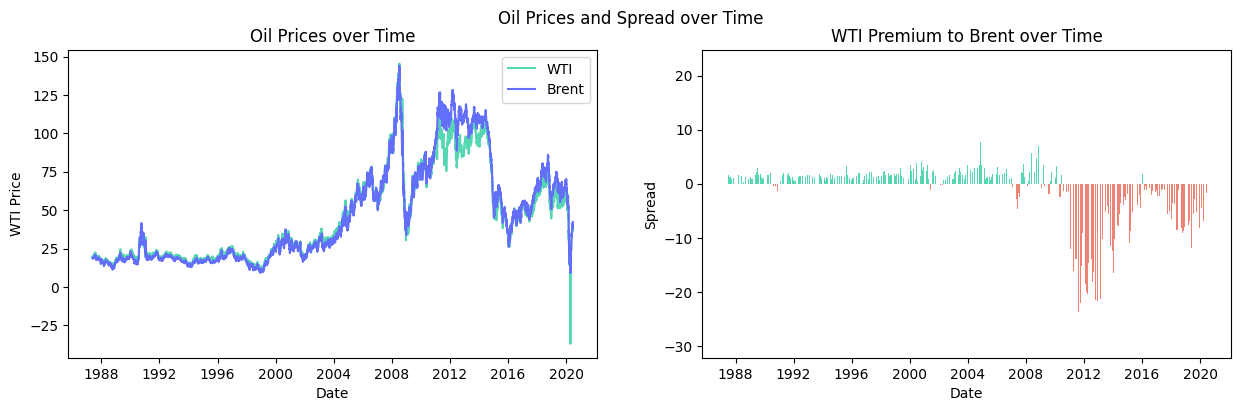

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))  
axes = axes.flatten()

axes[0].plot(oil_data.index, oil_data["WTI"], label = "WTI", color = GREEN)
axes[0].plot(oil_data.index, oil_data["Brent"], label = "Brent", color = BLUE)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('WTI Price')
axes[0].set_title('Oil Prices over Time')
axes[0].legend()

data_sub = oil_data[oil_data["Spread"] > -30]
color_seq = list(data_sub["Spread"].apply(lambda x: RED if x<0 else GREEN))
axes[1].bar(data_sub.index, data_sub["Spread"], color = color_seq)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Spread")
axes[1].set_title('WTI Premium to Brent over Time')

fig.suptitle("Oil Prices and Spread over Time")

plt.show()

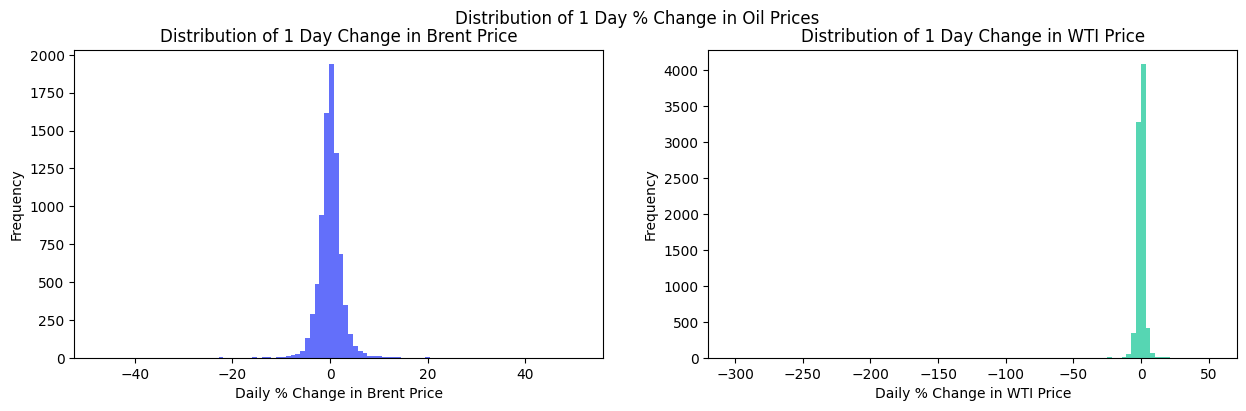

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))  
axes = axes.flatten()

axes[0].hist( oil_data["Brent_Daily_Change"]*100, color = BLUE, bins = 100)
axes[0].set_xlabel('Daily % Change in Brent Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of 1 Day Change in Brent Price')

axes[1].hist( oil_data["WTI_Daily_Change"]*100, color = GREEN, bins = 100)
axes[1].set_xlabel('Daily % Change in WTI Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of 1 Day Change in WTI Price')

fig.suptitle("Distribution of 1 Day % Change in Oil Prices")

plt.show()

In [26]:
# Pull Stock Data for the following: 

# Exxon Mobil - NYSE: XOM
# Chevron - NYSE: CVX
# Shell - NYSE: SHEL
# Total Energies - NYSE: TTE
# ConocoPhillips - NYSE: COP
# BP - NYSE: BP
# Equinor ASA - NYSE: EQNR
# Canadian Natural Resources - NYSE: CNQ
# Marathon Petroleum - NYSE: MPC


# IMPORTANT: Keep this set to false unless the data file is corrupted or you dont have it. YF API limits are super stringent
REFRESH_PRICE_DATA_PULL = False
tickers = ["XOM", 'CVX', 'SHEL', 'TTE', 'COP', 'BP', 'EQNR', 'CNQ', 'MPC']
tickers_to_names = {"XOM" : "Exxon Mobil",
                    'CVX' : "Chevron",
                    'SHEL':  "Shell",
                    'TTE' : "Total Energies",
                    'COP' : "Conoco Phillips",
                    'BP' : "British Petroleum",
                    'EQNR':  "Equinor ASA",
                    'CNQ' : "Canadian Natural Resources",
                    'MPC' : "Marathon Petroleum"}

In [17]:
# Toggle pulling the data again with the flag in the previous cell
if REFRESH_PRICE_DATA_PULL == True:

    # Use YF Database to pull stock data
    def get_price_data(tickers, start_date, end_date):
        """
        Get price time series data for each ticker between specified dates.

        Parameters:
            tickers (list): List of ticker symbols.
            start_date (str): Start date in 'YYYY-MM-DD' format.
            end_date (str): End date in 'YYYY-MM-DD' format.

        Returns:
            dict: Dictionary containing price data for each ticker.
        """
        price_data = {}
        for ticker in tickers:
            try:
                data = yf.download(ticker, start=start_date, end=end_date)
                price_data[ticker] = data
            except Exception as e:
                print(f"Error fetching data for {ticker}: {e}")
        return price_data


    # Pull stock data for specified tickers
    start_date = '1987-05-20'
    end_date = '2020-06-19'

    # This returns a dictionary that has tickername: Dataframe of stock prices + various other data
    price_data = get_price_data(tickers, start_date, end_date)

    
    def save_price_data(price_data, filename):
        """
        Save price data dictionary to a file using pickle.

        Parameters:
            price_data (dict): Dictionary containing price data for each ticker.
            filename (str): Name of the file to save.
        """
        with open(filename, 'wb') as f:
            pickle.dump(price_data, f)

    # Saves the dictionary to a pkl file for easy data pull without hitting API refresh limit
    save_price_data(price_data, 'price_data.pkl')


In [18]:
def load_price_data(filename):
    """
    Load price data dictionary from a file using pickle.

    Parameters:
        filename (str): Name of the file to load.

    Returns:
        dict: Dictionary containing price data for each ticker.
    """
    with open(filename, 'rb') as f:
        return pickle.load(f)


# Pull Data from local file

path_to_price_data = 'price_data.pkl'
price_data = load_price_data(path_to_price_data)


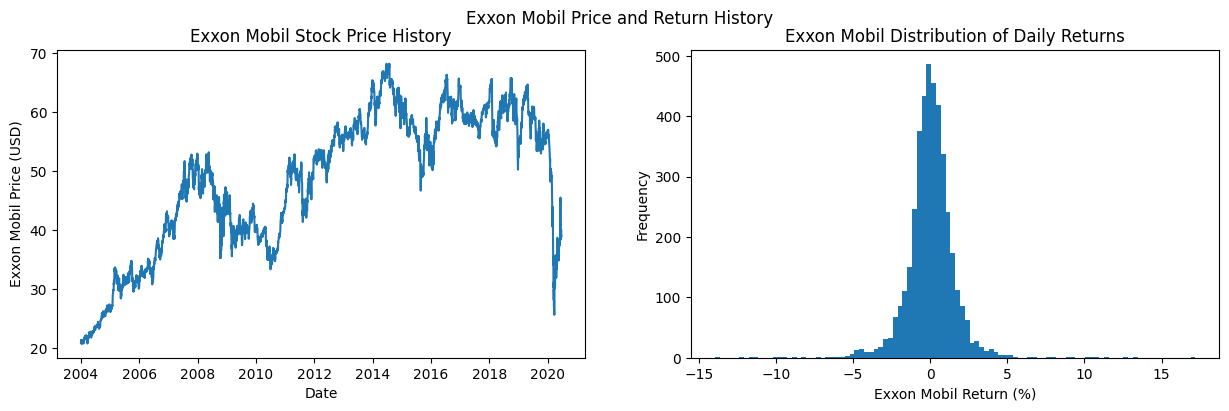

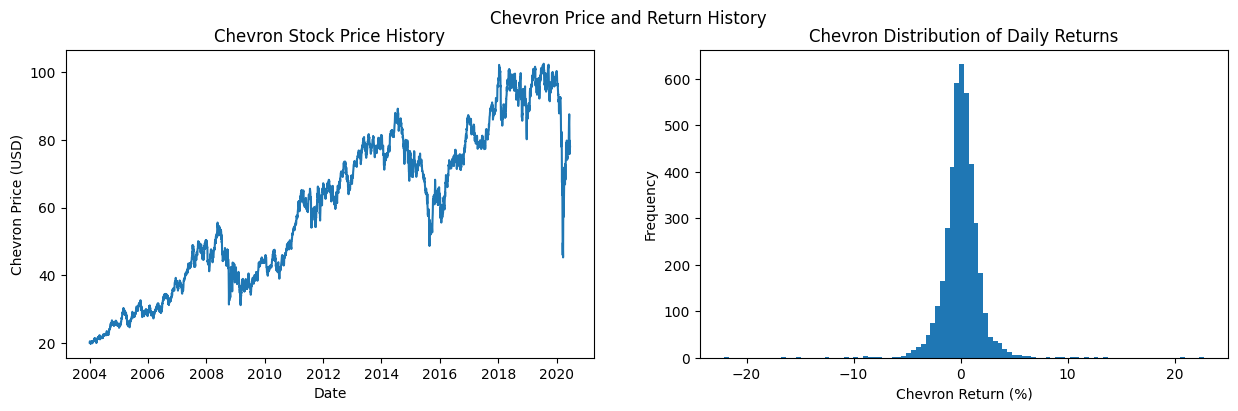

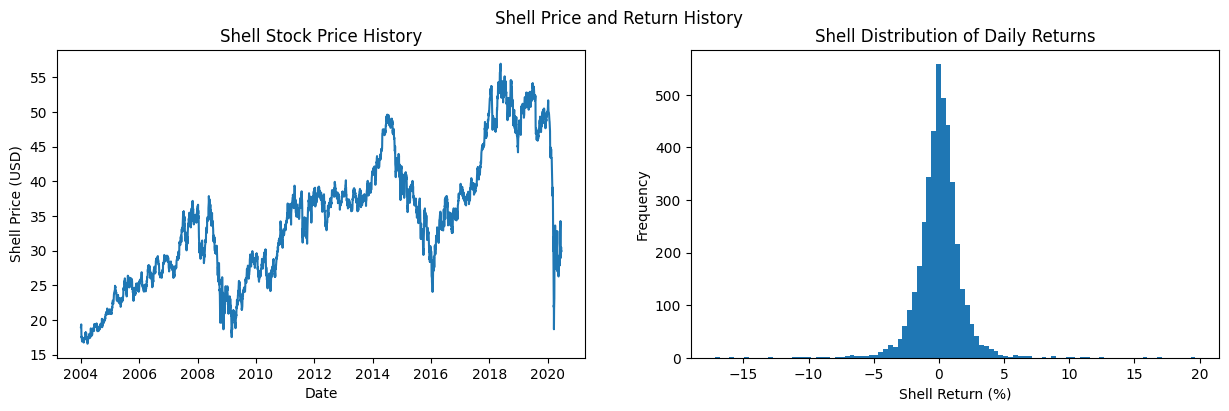

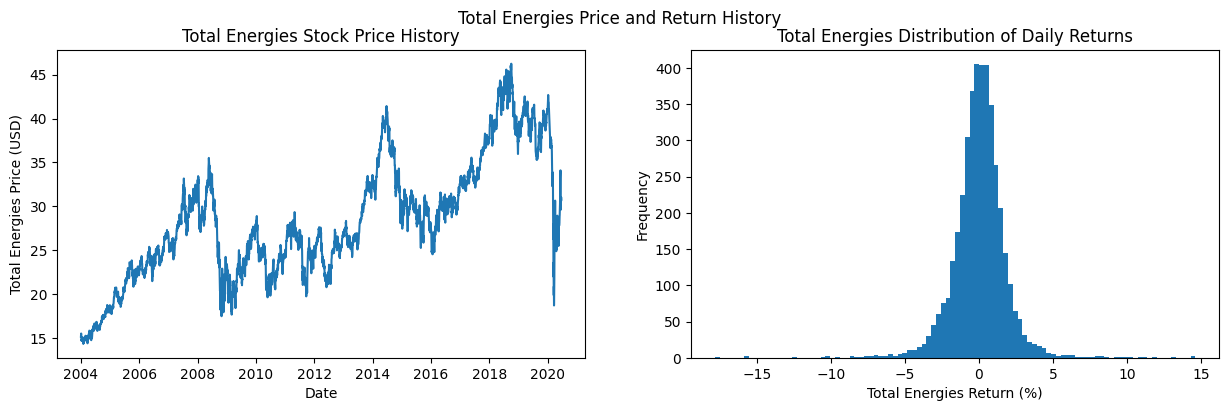

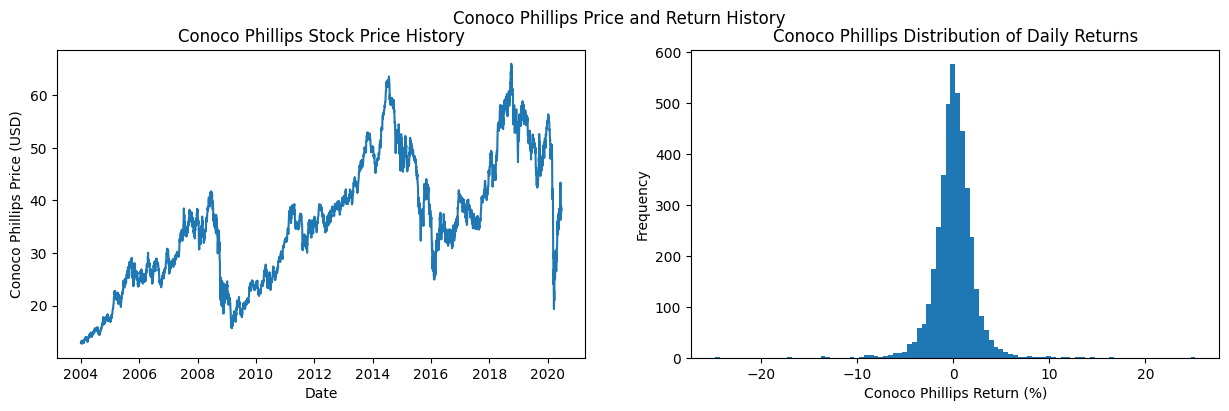

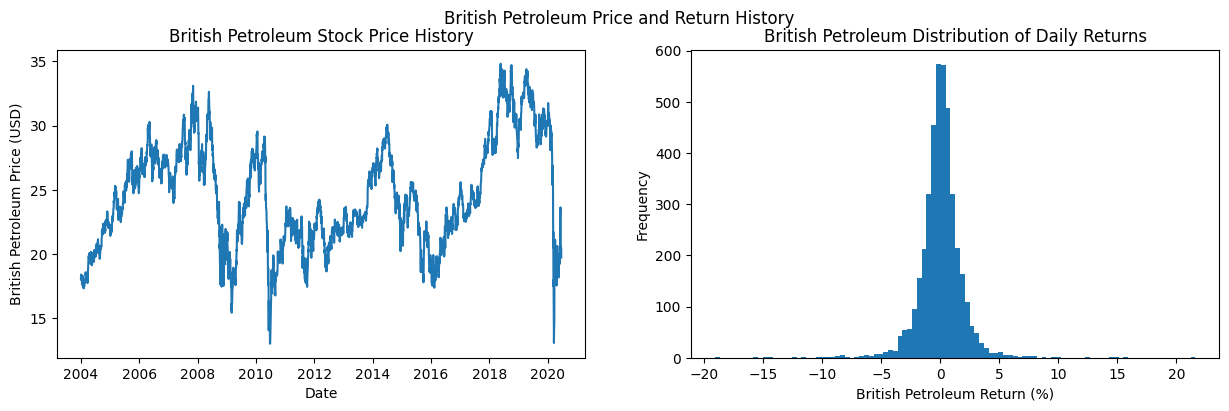

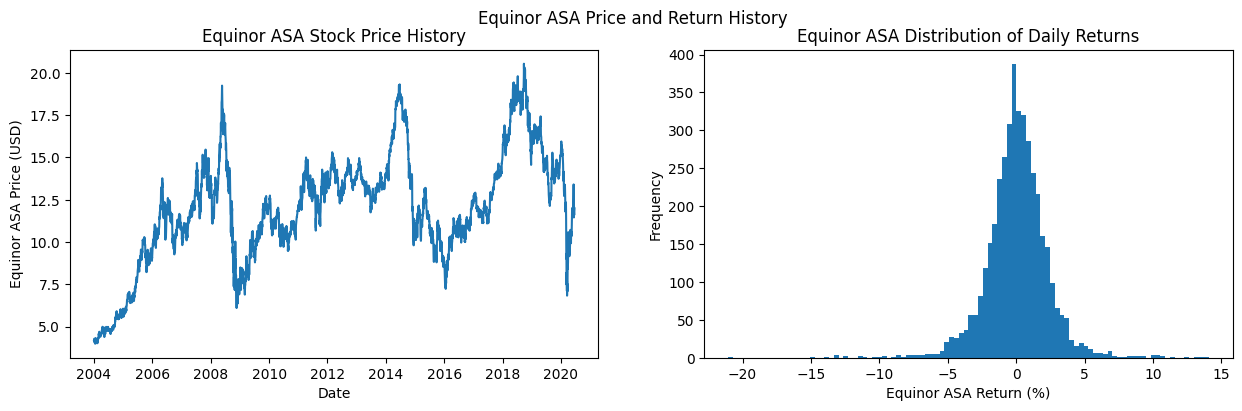

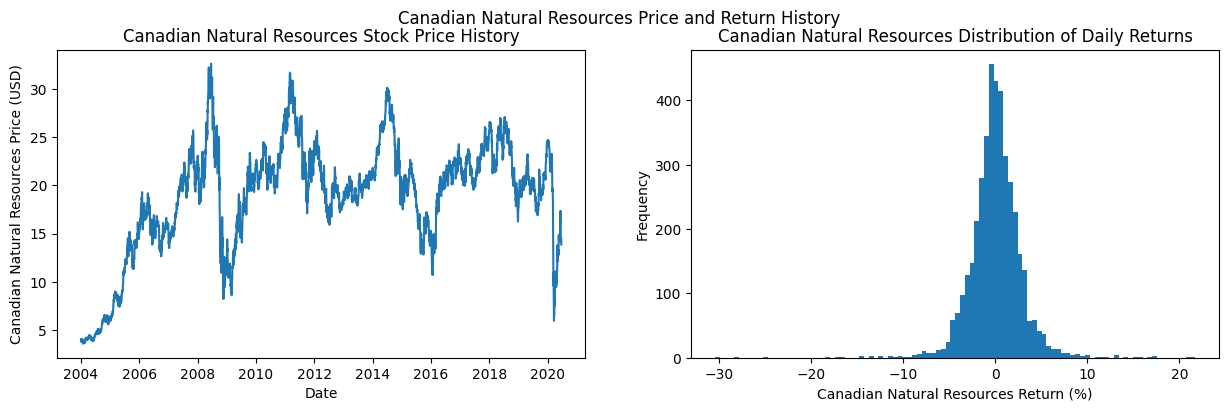

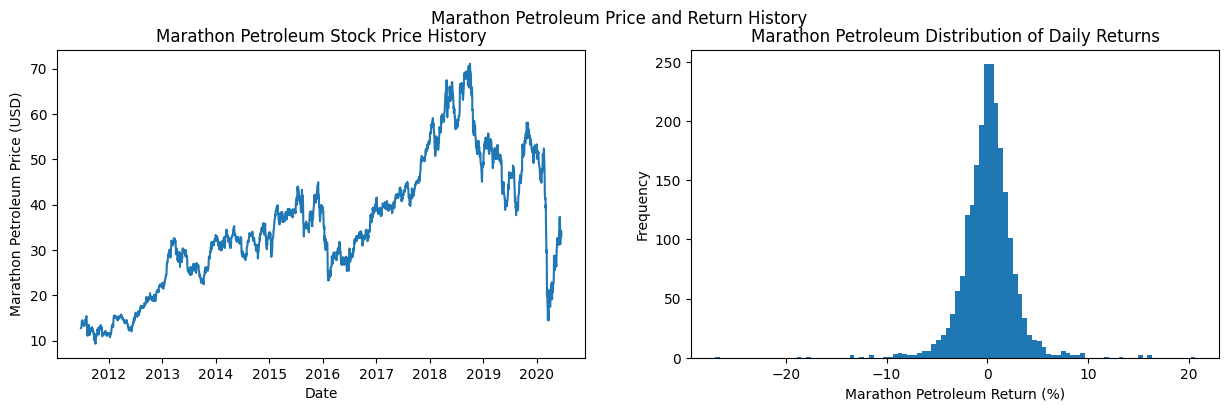

In [53]:
for tkr in tickers:
    data = price_data[tkr]
    data = data[data.index > "2004-01-01"]
    data = data.sort_index()
    data["Daily Return"] = data["Adj Close"].pct_change()

    fig, ax = plt.subplots(1, 2, figsize = (15, 4))
    ax = ax.flatten()

    ax[0].plot(data.index, data["Adj Close"])
    ax[0].set_title(f"{tickers_to_names[tkr]} Stock Price History")
    ax[0].set_xlabel(f"Date")
    ax[0].set_ylabel(f"{tickers_to_names[tkr]} Price (USD)")

    ax[1].hist( data["Daily Return"] * 100, bins = 100)
    ax[1].set_title(f"{tickers_to_names[tkr]} Distribution of Daily Returns")
    ax[1].set_xlabel(f"{tickers_to_names[tkr]} Return (%)")
    ax[1].set_ylabel(f"Frequency")

    fig.suptitle(f"{tickers_to_names[tkr]} Price and Return History")


    


## TODO: Construct Index

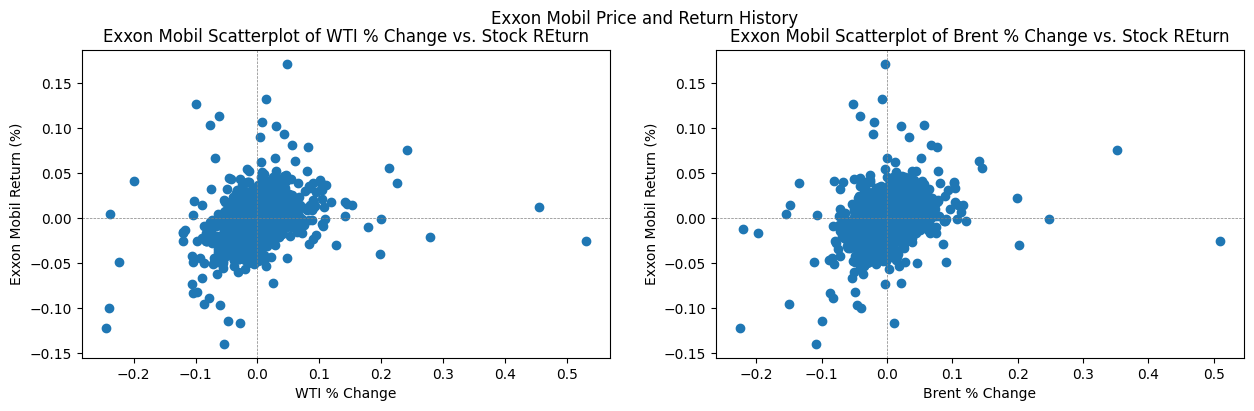

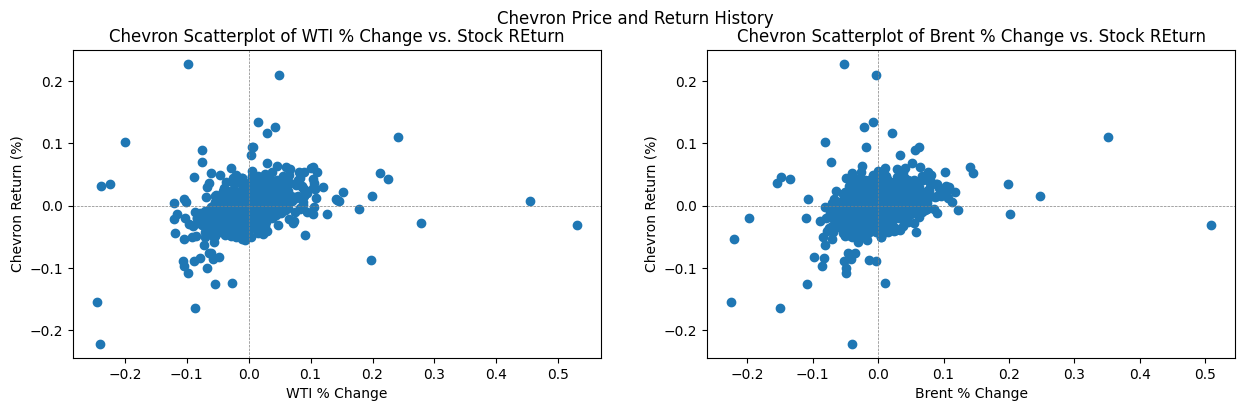

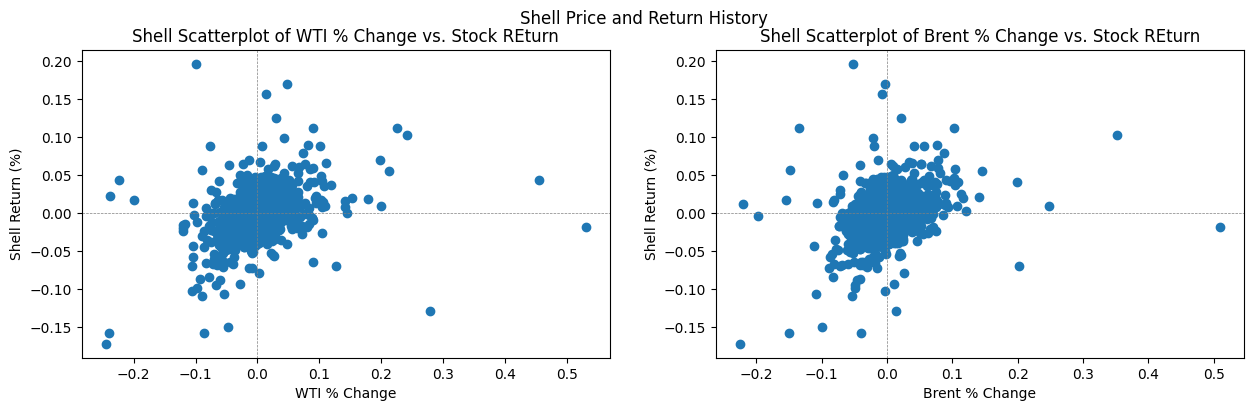

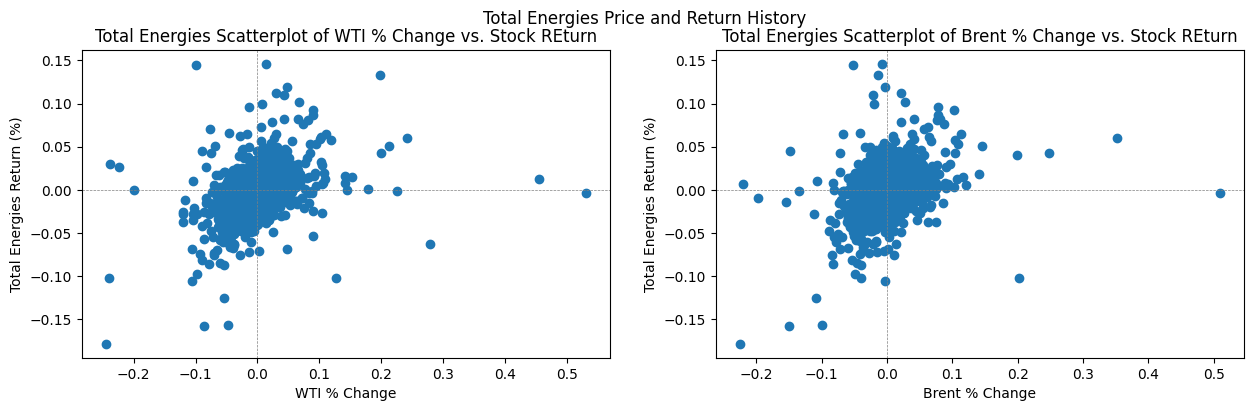

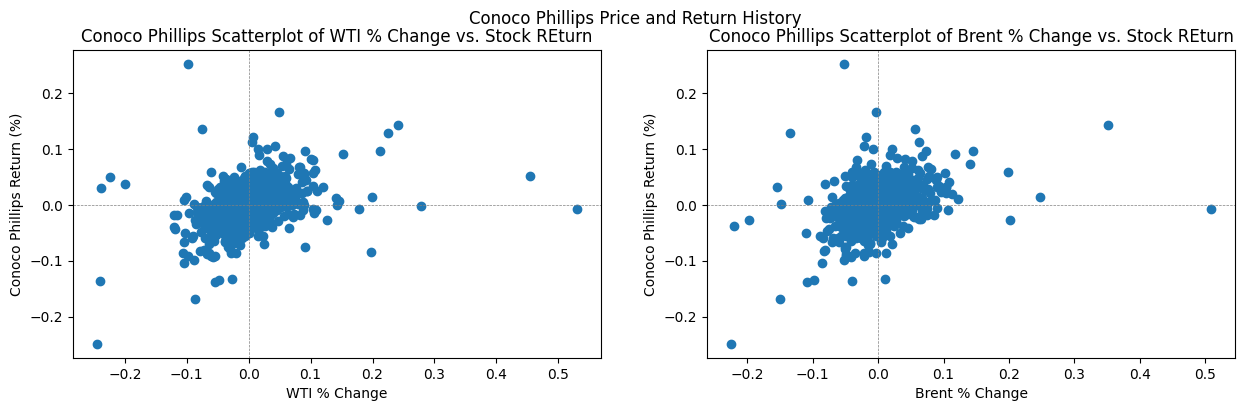

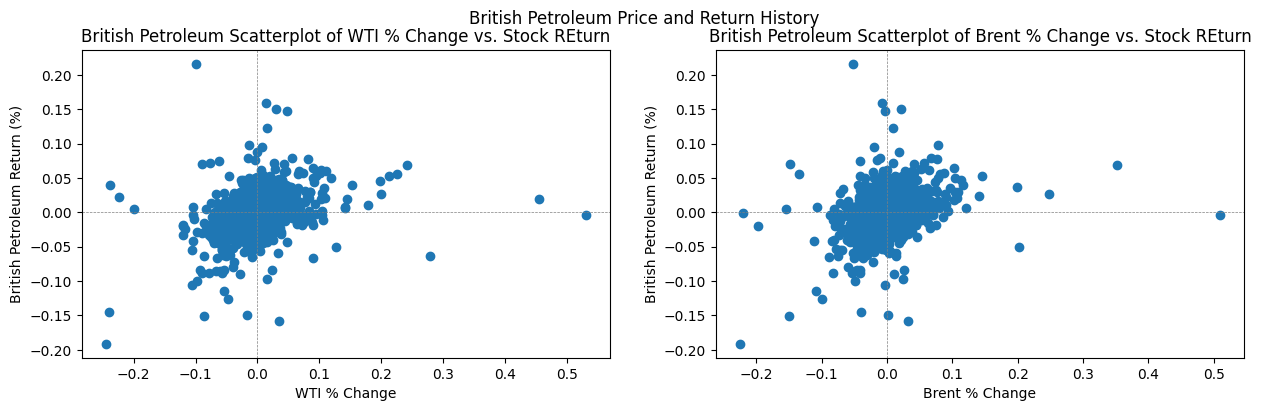

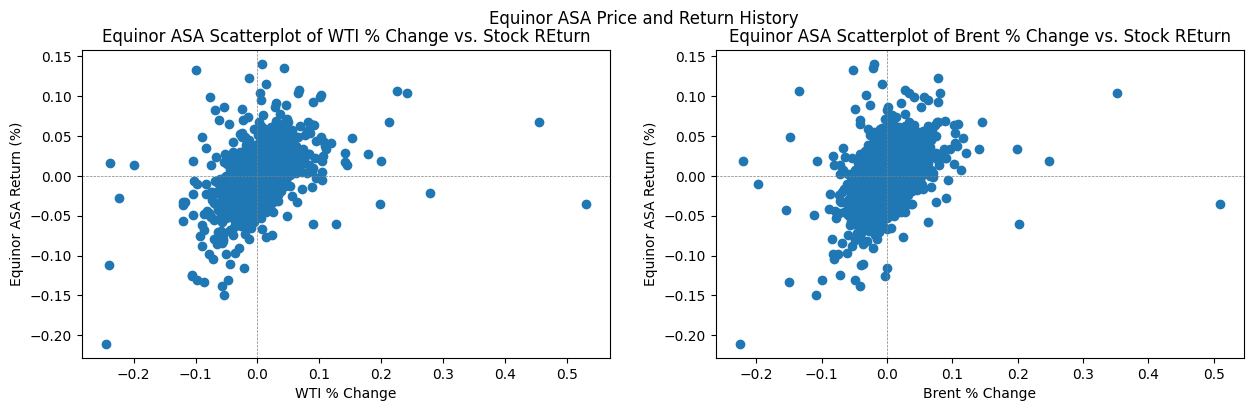

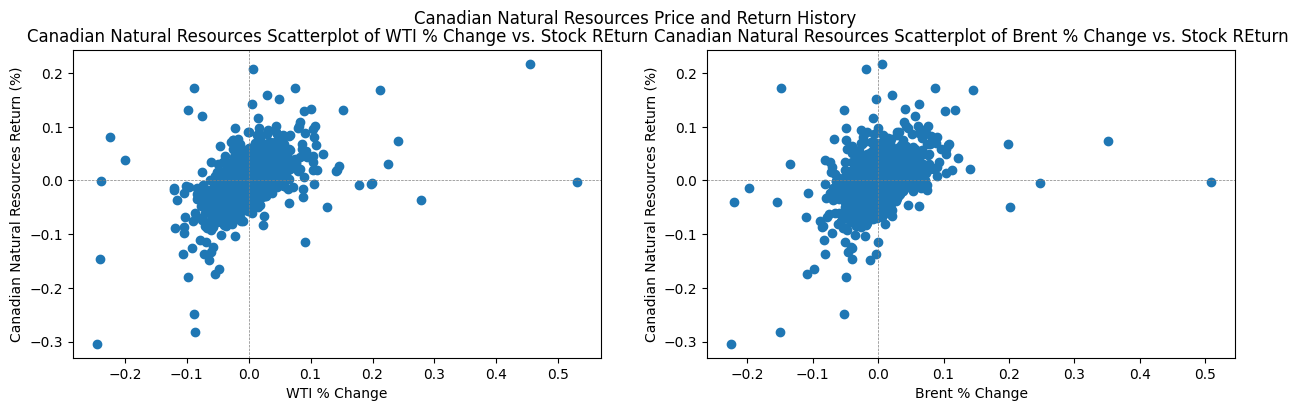

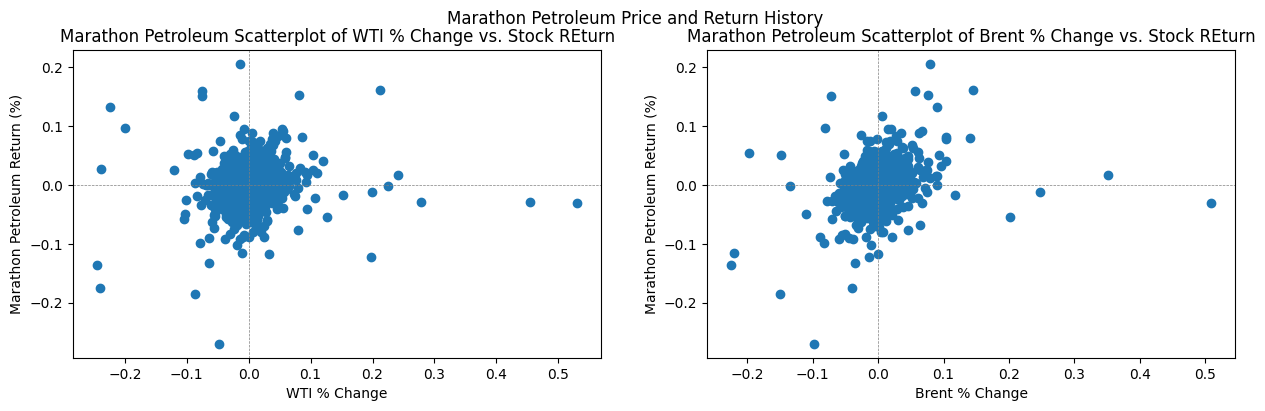

In [72]:
for tkr in tickers:
    data = price_data[tkr]
    data = data[data.index > "2004-01-01"]

    data = data.merge(oil_data, left_index=True, right_index=True, how= "inner")
    data = data[data["WTI_Daily_Change"] > -1]

    data = data.sort_index()
    data["Daily Return"] = data["Adj Close"].pct_change()


    fig, ax = plt.subplots(1, 2, figsize = (15, 4))
    ax = ax.flatten()

    ax[0].scatter(data["WTI_Daily_Change"], data["Daily Return"])
    ax[0].set_title(f"{tickers_to_names[tkr]} Scatterplot of WTI % Change vs. Stock REturn")
    ax[0].set_xlabel(f"WTI % Change")
    ax[0].set_ylabel(f"{tickers_to_names[tkr]} Return (%)")
    ax[0].axhline(0, color='grey', linewidth=0.5, linestyle='--')  
    ax[0].axvline(0, color='grey', linewidth=0.5, linestyle='--') 
    
    ax[1].scatter(data["Brent_Daily_Change"], data["Daily Return"])
    ax[1].set_title(f"{tickers_to_names[tkr]} Scatterplot of Brent % Change vs. Stock REturn")
    ax[1].set_xlabel(f"Brent % Change")
    ax[1].set_ylabel(f"{tickers_to_names[tkr]} Return (%)")
    ax[1].axhline(0, color='grey', linewidth=0.5, linestyle='--')  
    ax[1].axvline(0, color='grey', linewidth=0.5, linestyle='--')  

    fig.suptitle(f"{tickers_to_names[tkr]} Price and Return History")

,WTI,Brent
Date,,
1987-05-20,19.75,18.63
1987-05-21,19.95,18.45
1987-05-22,19.68,18.55
1987-05-26,19.35,18.63
1987-05-27,19.38,18.60
...,...,...
2020-06-15,37.07,39.44
2020-06-16,38.26,40.75
2020-06-17,37.91,40.47
